In [2]:
print("hello world")

hello world


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.duplicated().sum()

352

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

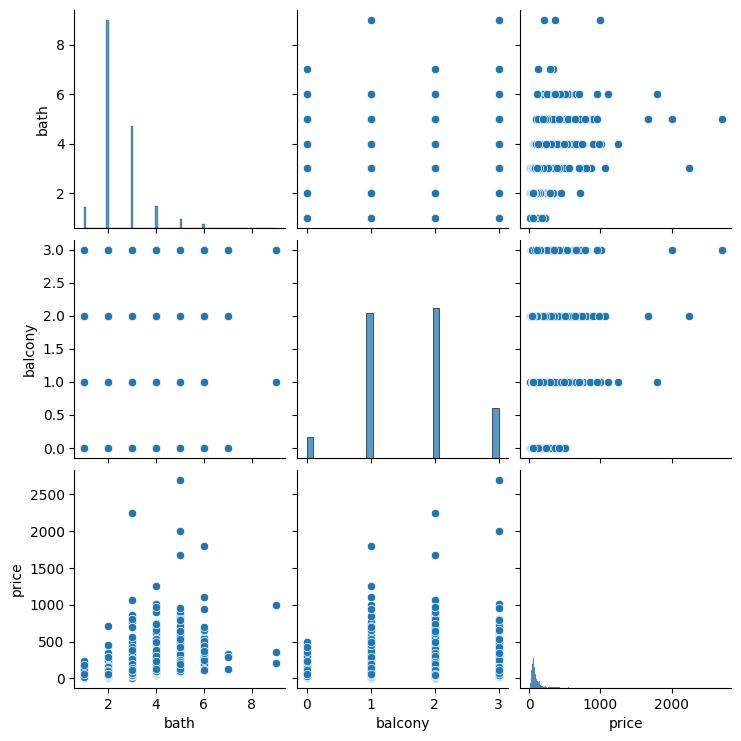

In [11]:
sns.pairplot(df)

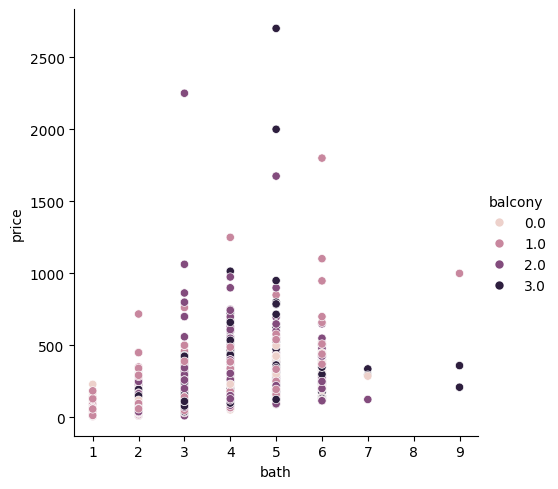

In [45]:
sns.relplot(x = 'bath' , y = "price" , data = df , hue = 'balcony')

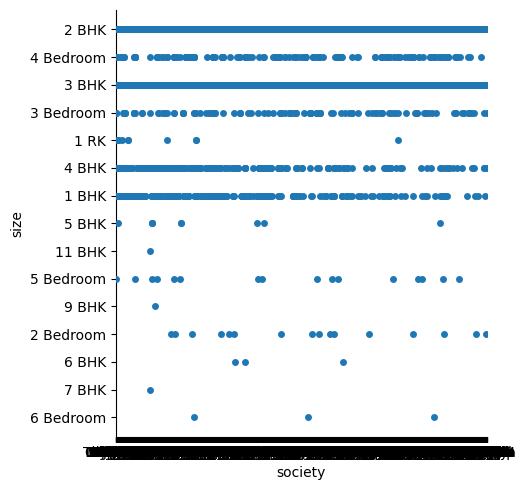

In [46]:
sns.catplot(x = 'society' , y = "size" , data = df)

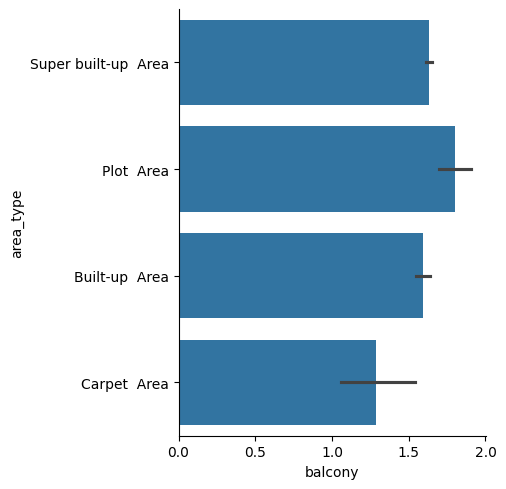

In [49]:
sns.catplot(x = 'balcony' , y = "area_type" ,kind='bar', data = df)

In [12]:
cat_col = df.select_dtypes(include = "O")
num_col = df.select_dtypes(exclude = "O")

In [13]:
cat_col

,area_type,availability,location,size,society,total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785
...,...,...,...,...,...,...
13308,Built-up Area,Ready To Move,Bannerghatta Road,3 BHK,Baanise,1527
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141


In [14]:
num_col

,bath,balcony,price
0,2.0,1.0,39.07
1,5.0,3.0,120.00
3,3.0,1.0,95.00
5,2.0,1.0,38.00
11,5.0,3.0,295.00
...,...,...,...
13308,3.0,1.0,142.00
13314,3.0,3.0,112.00
13315,4.0,0.0,231.00
13317,2.0,1.0,60.00


In [15]:
from sklearn.preprocessing import OrdinalEncoder

In [16]:
encoder = OrdinalEncoder()

In [17]:
encoder.fit(cat_col)

OrdinalEncoder()

In [18]:
transform_df = encoder.transform(cat_col)

In [19]:
num_col.shape

(7144, 3)

In [20]:
num_col.isnull().sum()

bath       0
balcony    0
price      0
dtype: int64

In [21]:
cat_col = pd.DataFrame(transform_df , columns = encoder.get_feature_names_out())

In [22]:
cat_col

,area_type,availability,location,size,society,total_sqft
0,3.0,35.0,210.0,3.0,443.0,63.0
1,2.0,73.0,149.0,8.0,2353.0,1128.0
2,3.0,73.0,387.0,5.0,2109.0,551.0
3,3.0,73.0,625.0,3.0,585.0,192.0
4,2.0,73.0,625.0,8.0,1566.0,1163.0
...,...,...,...,...,...,...
7139,0.0,73.0,91.0,5.0,262.0,557.0
7140,3.0,73.0,234.0,5.0,2148.0,725.0
7141,0.0,73.0,625.0,10.0,197.0,1262.0
7142,0.0,73.0,490.0,3.0,1168.0,159.0


In [23]:
cat_col.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
dtype: int64

In [24]:
final_df = pd.concat([num_col,cat_col] , axis = 1)

In [25]:
final_df

,bath,balcony,price,area_type,availability,location,size,society,total_sqft
0,2.0,1.0,39.07,3.0,35.0,210.0,3.0,443.0,63.0
1,5.0,3.0,120.00,2.0,73.0,149.0,8.0,2353.0,1128.0
3,3.0,1.0,95.00,3.0,73.0,625.0,3.0,585.0,192.0
5,2.0,1.0,38.00,3.0,73.0,24.0,3.0,2015.0,0.0
11,5.0,3.0,295.00,3.0,35.0,119.0,5.0,1983.0,762.0
...,...,...,...,...,...,...,...,...,...
7133,NaN,NaN,NaN,3.0,73.0,521.0,7.0,1591.0,1080.0
7137,NaN,NaN,NaN,3.0,73.0,351.0,3.0,180.0,19.0
7139,NaN,NaN,NaN,0.0,73.0,91.0,5.0,262.0,557.0
7141,NaN,NaN,NaN,0.0,73.0,625.0,10.0,197.0,1262.0


In [26]:
final_df.isnull().sum()

bath            3266
balcony         3266
price           3266
area_type       3266
availability    3266
location        3266
size            3266
society         3266
total_sqft      3266
dtype: int64

In [27]:
final_df.dropna(inplace = True)

In [28]:
final_df

,bath,balcony,price,area_type,availability,location,size,society,total_sqft
0,2.0,1.0,39.07,3.0,35.0,210.0,3.0,443.0,63.0
1,5.0,3.0,120.00,2.0,73.0,149.0,8.0,2353.0,1128.0
3,3.0,1.0,95.00,3.0,73.0,625.0,3.0,585.0,192.0
5,2.0,1.0,38.00,3.0,73.0,24.0,3.0,2015.0,0.0
11,5.0,3.0,295.00,3.0,35.0,119.0,5.0,1983.0,762.0
...,...,...,...,...,...,...,...,...,...
7135,2.0,2.0,72.00,3.0,24.0,253.0,5.0,1795.0,806.0
7136,2.0,1.0,45.00,3.0,73.0,209.0,3.0,694.0,67.0
7138,2.0,0.0,130.00,3.0,73.0,490.0,3.0,777.0,211.0
7140,2.0,2.0,70.00,3.0,73.0,234.0,5.0,2148.0,725.0


In [29]:
x = final_df.drop('price' , axis = 1)

In [30]:
y = final_df[['price']]

In [31]:
x

,bath,balcony,area_type,availability,location,size,society,total_sqft
0,2.0,1.0,3.0,35.0,210.0,3.0,443.0,63.0
1,5.0,3.0,2.0,73.0,149.0,8.0,2353.0,1128.0
3,3.0,1.0,3.0,73.0,625.0,3.0,585.0,192.0
5,2.0,1.0,3.0,73.0,24.0,3.0,2015.0,0.0
11,5.0,3.0,3.0,35.0,119.0,5.0,1983.0,762.0
...,...,...,...,...,...,...,...,...
7135,2.0,2.0,3.0,24.0,253.0,5.0,1795.0,806.0
7136,2.0,1.0,3.0,73.0,209.0,3.0,694.0,67.0
7138,2.0,0.0,3.0,73.0,490.0,3.0,777.0,211.0
7140,2.0,2.0,3.0,73.0,234.0,5.0,2148.0,725.0


In [32]:
y

,price
0,39.07
1,120.00
3,95.00
5,38.00
11,295.00
...,...
7135,72.00
7136,45.00
7138,130.00
7140,70.00


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y , test_size = 0.2 , random_state = 42)

In [34]:
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.svm import SVC , SVR

In [35]:
lgr = LogisticRegression()
lr = LinearRegression()

In [36]:
lr.fit(x_train,y_train)

LinearRegression()

In [37]:
print(lr.score(x_test,y_test))

0.39499205010025473


In [38]:
# lgr.fit(x_train,y_train)

In [39]:
model = DecisionTreeRegressor(criterion = "squared_error" , max_depth = 3 , random_state = 42)

In [40]:
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [41]:
y_pred = model.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score

In [55]:
y_pred = y_pred.astype(int)

In [56]:
y_pred

array([270, 119,  62,  62,  62,  62,  62,  62, 119,  62, 119, 119,  62,
        36, 119,  62,  62, 152,  62,  62, 119, 119,  62,  36, 119,  36,
       119,  62,  62,  62,  36,  62,  62,  62,  62, 119,  62,  62,  62,
        62, 119,  62, 119,  62, 181,  36, 119,  62,  62, 119,  62,  62,
        62,  62,  62,  36,  36,  62,  62,  62,  62, 152,  62,  62,  62,
        62,  36,  62,  62,  62,  62,  62, 119,  62, 237,  62,  62, 119,
       119,  62, 119, 119,  36,  62, 468,  36,  62,  62,  62,  62,  62,
        62, 119,  62,  62,  62,  62,  62, 119,  62, 119,  62,  62,  62,
       119, 237, 119, 119, 119,  62,  62, 119,  62,  62,  62,  62,  62,
        62, 119,  62, 270, 119, 237, 119,  62, 119,  62,  62, 119,  62,
        62, 181,  62,  62,  62,  62,  62,  62, 270,  62,  62,  62,  62,
       119, 119,  62,  62,  62, 119,  62, 237,  62,  62,  62,  62, 119,
       119, 119, 119, 119,  62,  62,  62,  62, 119,  62, 237,  62, 181,
        62,  36,  62,  62, 270, 119, 119,  62,  62,  62,  36,  6

In [57]:
y_test = np.array(y_test)

In [59]:
y_test = y_test.astype(int)

In [60]:
y_test

array([[ 343],
       [ 116],
       [  52],
       [  53],
       [  75],
       [  50],
       [  43],
       [  28],
       [  57],
       [  45],
       [ 130],
       [  52],
       [  68],
       [  52],
       [  95],
       [  46],
       [  39],
       [  81],
       [  75],
       [  62],
       [  52],
       [ 120],
       [  55],
       [  28],
       [  65],
       [  23],
       [  50],
       [  33],
       [  42],
       [  50],
       [  27],
       [  94],
       [  57],
       [  37],
       [  48],
       [ 110],
       [  58],
       [  40],
       [  45],
       [  48],
       [  95],
       [  45],
       [  69],
       [  49],
       [ 725],
       [  11],
       [  95],
       [  42],
       [  61],
       [ 149],
       [  47],
       [  25],
       [  65],
       [  58],
       [  70],
       [  26],
       [  10],
       [  37],
       [  48],
       [  42],
       [  69],
       [ 120],
       [  40],
       [  90],
       [  79],
       [  75],
       [  

In [61]:
accuracy = accuracy_score(y_test,y_pred)

In [63]:
accuracy

0.011597938144329897

In [62]:
svmmodel = SVR(kernel = "linear" , C = 1).fit(x_train,y_train)

C:\Users\anshi\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
print(svmmodel.score(x_test,y_test))

0.3008998639528008
